# Python Notebook for cleaning and analysis of Movie Dataset

Name: Rushikesh Jyoti

Division: A

Roll no: 27

SRN: 201901139

In [81]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plot

In [82]:
df = pd.read_csv('C:\VS_Workshop\Sem 6\Data Mining and Predictive Modelling\Assignments\Ass3\MovieAssignmentData.csv')

df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## Does the dataset contain any NA values?

In [83]:
df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

Yup, pretty much every column has null values

## Lets remove some columns

In [84]:
likes = [col for col in df.columns if 'likes' in col]
likes.extend(['aspect_ratio', 'color', 'facenumber_in_poster', 'movie_imdb_link', 'num_voted_users'])
likes.extend([col for col in df.columns if 'reviews' in col])
df.drop(likes, axis=1, inplace=True)
df.head()

,director_name,duration,actor_2_name,gross,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,language,country,content_rating,budget,title_year,imdb_score
0,James Cameron,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi,avatar|future|marine|native|paraplegic,English,USA,PG-13,237000000.0,2009.0,7.9
1,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,English,USA,PG-13,300000000.0,2007.0,7.1
2,Sam Mendes,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,English,UK,PG-13,245000000.0,2015.0,6.8
3,Christopher Nolan,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,English,USA,PG-13,250000000.0,2012.0,8.5
4,Doug Walker,NaN,Rob Walker,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1


In [85]:
print(df.isna().sum())

director_name     104
duration           15
actor_2_name       13
gross             884
genres              0
actor_1_name        7
movie_title         0
actor_3_name       23
plot_keywords     153
language           12
country             5
content_rating    303
budget            492
title_year        108
imdb_score          0
dtype: int64


In [86]:
df['duration'].fillna(df['duration'].mean(), inplace=True)
df['gross'].fillna(df['gross'].mean(), inplace=True)
df['budget'].fillna(df['budget'].mean(), inplace=True)
df['title_year'].fillna(df['title_year'].mean(), inplace=True)

The other columns are categorial data
And it doesnt make sense to fill values like `director name` with a mean value so we just omit the NAs

In [87]:
df.dropna(inplace=True)

In [98]:
df.isna().sum()

director_name     0
duration          0
actor_2_name      0
gross             0
genres            0
actor_1_name      0
movie_title       0
actor_3_name      0
plot_keywords     0
language          0
country           0
content_rating    0
budget            0
title_year        0
imdb_score        0
dtype: int64

YAY!! our dataset is clean now

In [88]:
df.columns

Index(['director_name', 'duration', 'actor_2_name', 'gross', 'genres',
       'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords',
       'language', 'country', 'content_rating', 'budget', 'title_year',
       'imdb_score'],
      dtype='object')

In [89]:
sb.set(font_scale = 1.8)

# Heatmap of correlation

<AxesSubplot:>

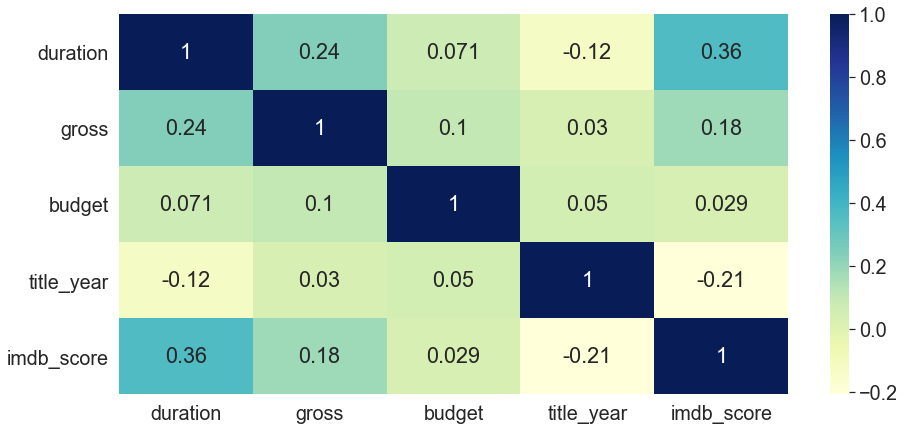

In [90]:
plot.figure(figsize=(15, 7))
sb.heatmap(df.corr(), cmap='YlGnBu', annot=True)

## Gross income over the years

<AxesSubplot:xlabel='title_year', ylabel='gross'>

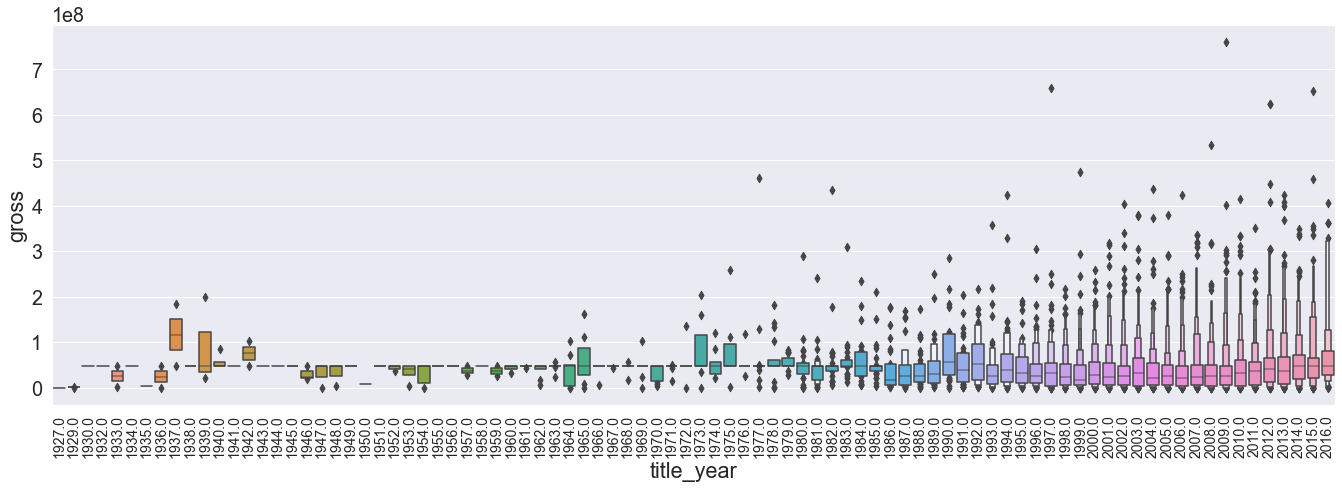

In [91]:
plot.figure(None, (23, 7))
plot.xticks(rotation=90, fontsize=14)
plot.xlabel("Year")
sb.boxenplot(x='title_year', y='gross', data=df)

## IMDB Scores over the years

<AxesSubplot:xlabel='title_year', ylabel='imdb_score'>

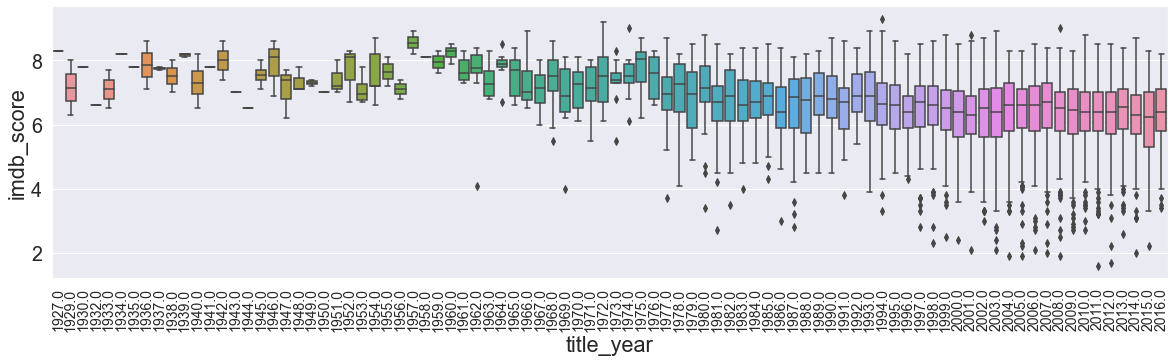

In [92]:
plot.figure(1, (20, 5))
plot.xticks(rotation=90, fontsize=14)
sb.boxplot(y='imdb_score', x='title_year', data=df)

<AxesSubplot:xlabel='gross', ylabel='budget'>

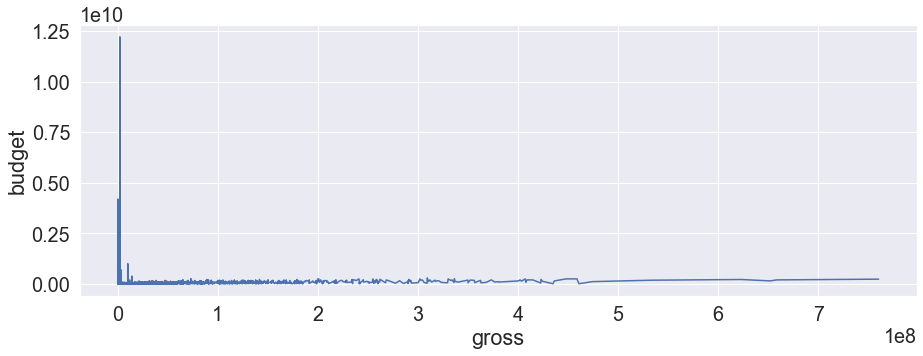

In [97]:
plot.figure(1, (15, 5))
sb.lineplot(x='gross', y='budget', data=df)
